$$\lambda_p=S+A_1p+A_2p^2+A_3p^3$$

In [79]:
import math
import numpy as np
from lmfit import models
from scipy.optimize import fsolve
import pandas as pd

In [80]:
lamda_p=[585.25,614.31,640.23,650.75]
lamda_p_error=[0.1,2,2,5]
lamda_p_weight = 1/(np.array(lamda_p_error))
p=[1736.72,2198.79,2756.45,2968.9]
p_error=[18,20,20,20]
p_weight =1/(np.array(p_error))

In [81]:
df = pd.DataFrame({'lamda_p': lamda_p,
                    'lamda_weight':lamda_p_weight,
                    'p':p,
                    'p_weight':p_weight})
df

,lamda_p,lamda_weight,p,p_weight
0,585.25,10.0,1736.72,0.055556
1,614.31,0.5,2198.79,0.050000
2,640.23,0.5,2756.45,0.050000
3,650.75,0.2,2968.90,0.050000


(0.0, 700.0)

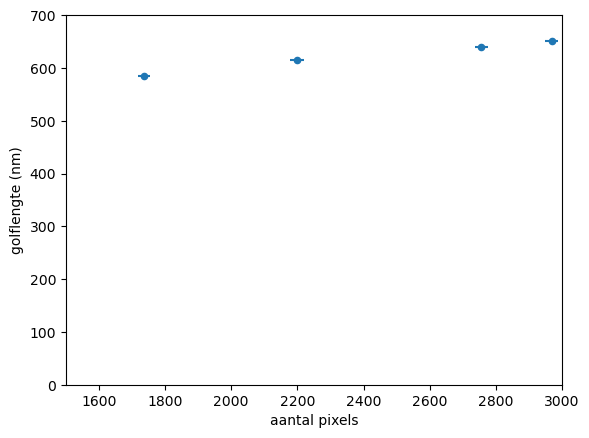

In [82]:
ax = df.plot.scatter('p', 'lamda_p',xerr=p_error,yerr=lamda_p_error)

# Set axis labels
ax.set_xlabel('aantal pixels')
ax.set_ylabel('golflengte (nm)')

# Set axis view limits
ax.set_xlim(1500, 3000)
ax.set_ylim(0, 700)

In [83]:
def formule(S,p,A_1,A_2,A_3):
    lamda_p=S+A_1 *p + A_2*p**2 +A_3*p**3 
    return lamda_p
curve_model= models.Model(formule)

In [84]:
fit_reuslt=curve_model.fit(lamda_p,p=p,weights=p_weight, S=230,A_1=0.4,A_2=0.001,A_3=0.00000001)

TypeError: '>' not supported between instances of 'list' and 'float'